# Data Cleaning

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Training Data

Data we collected is split into two by source. We merge that into one full dataset for our uses.

In [2]:
df1 = pd.read_csv('pisa2009train.csv')

In [3]:
df2 = pd.read_csv('pisa2009test.csv')

In [4]:
df = pd.concat([df1,df2])

In [5]:
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


From source (https://ocw.mit.edu/courses/sloan-school-of-management/15-071-the-analytics-edge-spring-2017/linear-regression/assignment-2/reading-test-scores/) :

_The Programme for International Student Assessment (PISA) is a test given every three years to 15-year-old students from around the world to evaluate their performance in mathematics, reading, and science. This dataset contains information about the demographics and schools for American students taking the exam, derived from 2009 PISA Public-Use Data Files distributed by the United States National Center for Education Statistics (NCES)._ 

_Each row in the dataset represents one student taking the exam. The datasets have the following variables:_

_grade: The grade in school of the student (most 15-year-olds in America are in 10th grade)_

_male: Whether the student is male (1/0)_

_raceeth: The race/ethnicity composite of the student_

_preschool: Whether the student attended preschool (1/0)_

_expectBachelors: Whether the student expects to obtain a bachelor's degree (1/0)_

_motherHS: Whether the student's mother completed high school (1/0)_

_motherBachelors: Whether the student's mother obtained a bachelor's degree (1/0)_

_motherWork: Whether the student's mother has part-time or full-time work (1/0)_

_fatherHS: Whether the student's father completed high school (1/0)_

_fatherBachelors: Whether the student's father obtained a bachelor's degree (1/0)_

_fatherWork: Whether the student's father has part-time or full-time work (1/0)_

_selfBornUS: Whether the student was born in the United States of America (1/0)_

_motherBornUS: Whether the student's mother was born in the United States of America (1/0)_

_fatherBornUS: Whether the student's father was born in the United States of America (1/0)_

_englishAtHome: Whether the student speaks English at home (1/0)_

_computerForSchoolwork: Whether the student has access to a computer for schoolwork (1/0)_

_read30MinsADay: Whether the student reads for pleasure for 30 minutes/day (1/0)_

_minutesPerWeekEnglish: The number of minutes per week the student spend in English class_

_studentsInEnglish: The number of students in this student's English class at school_

_schoolHasLibrary: Whether this student's school has a library (1/0)_

_publicSchool: Whether this student attends a public school (1/0)_

_urban: Whether this student's school is in an urban area (1/0)_

_schoolSize: The number of students in this student's school_

_readingScore: The student's reading score, on a 1000-point scale_

## Null Values

We see there are some null values, let's see how much of our dataframe is made up of these as they will affect our ability to model.

In [6]:
df.shape

(5233, 24)

In [7]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['null_count']).reset_index()
percent = pd.DataFrame((1-(round(df.count()/5233,2)))*100,columns=['percent_of_total']).reset_index()
nulls.merge(percent,how='left',on='index')

,index,null_count,percent_of_total
0,fatherBachelors,857,16.0
1,motherBachelors,585,11.0
2,fatherHS,370,7.0
3,studentsInEnglish,363,7.0
4,fatherWork,346,7.0
5,minutesPerWeekEnglish,289,6.0
6,schoolSize,231,4.0
7,schoolHasLibrary,201,4.0
8,fatherBornUS,171,3.0
9,motherHS,142,3.0


From here, we can see there are two features who have over 10% over their rows made up by null values.
* fatherBachelors
* motherBachelors

We aren't sure why there are so many null values, but to drop these rows might introduce bias into our data. For example, this could be explained by parents' degrees being self reported, so the parents that didn't get a bachelors' or higher were self conscious about it and chose not to report it.

To avoid possible bias in our statistical tests, we will remove these features instead of their rows.

In [13]:
df.drop(columns=['fatherBachelors', 'motherBachelors'],inplace=True)

In [16]:
df.shape

(5233, 22)

Now, we can remove the rows with null features from our dataframe.

In [19]:
df.dropna(inplace=True)

In [21]:
df.shape

(3858, 22)

This cut off a lot of rows, but leaves us a big enough sample to work with.

In [22]:
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherWork,fatherHS,fatherWork,selfBornUS,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
7,10,0,White,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36


## Categorical Features

Let's explore our columns more.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3858 entries, 1 to 1569
Data columns (total 22 columns):
grade                    3858 non-null int64
male                     3858 non-null int64
raceeth                  3858 non-null object
preschool                3858 non-null float64
expectBachelors          3858 non-null float64
motherHS                 3858 non-null float64
motherWork               3858 non-null float64
fatherHS                 3858 non-null float64
fatherWork               3858 non-null float64
selfBornUS               3858 non-null float64
motherBornUS             3858 non-null float64
fatherBornUS             3858 non-null float64
englishAtHome            3858 non-null float64
computerForSchoolwork    3858 non-null float64
read30MinsADay           3858 non-null float64
minutesPerWeekEnglish    3858 non-null float64
studentsInEnglish        3858 non-null float64
schoolHasLibrary         3858 non-null float64
publicSchool             3858 non-null int64
urban  

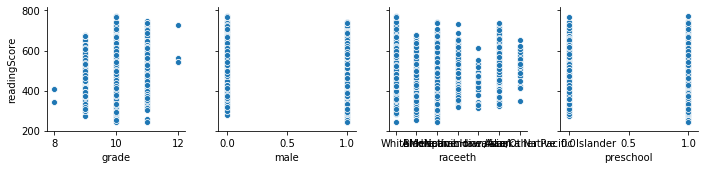

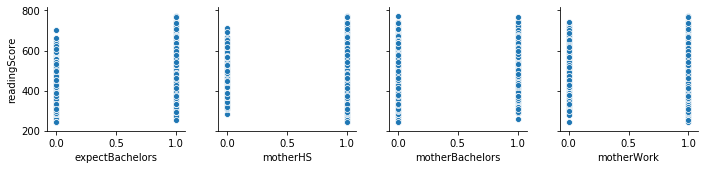

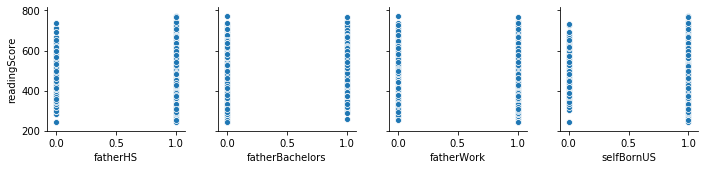

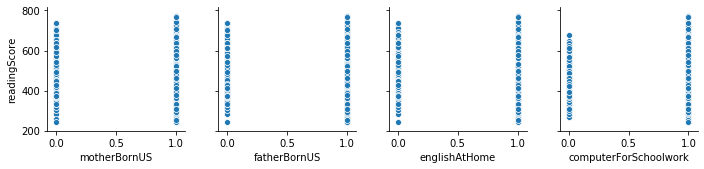

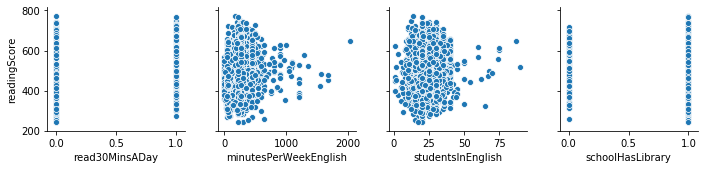

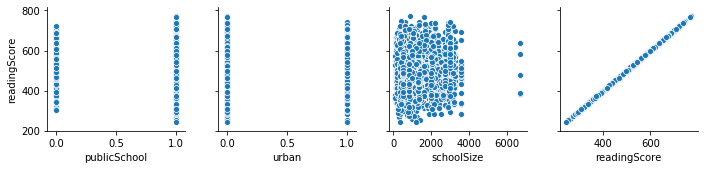

In [11]:
for i in range(0,len(df.columns),4):
    columns = []
    for x in range(4):
        columns.append(df.columns[i+x])
    sns.pairplot(df,y_vars='readingScore',x_vars=columns)

We can see that, aside from all of our dummy variables, we have two categorical variables:
* raceeth
* grade

In [12]:
df['raceeth'].unique()

array(['White', 'Black', 'Hispanic', 'More than one race',
       'American Indian/Alaska Native', 'Asian',
       'Native Hawaiian/Other Pacific Islander'], dtype=object)

In [13]:
df['grade'].unique()

array([11, 10,  9, 12,  8])

Since `raceeth` has string values, we'll create dummy variables for it.

In [14]:
raceeth_dummies = pd.get_dummies(df['raceeth'], drop_first=True)
df = df.drop(['raceeth'], axis=1)
df = pd.concat([df, raceeth_dummies], axis=1)

In [15]:
df.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,1173.0,575.01,0,0,0,0,0,1
3,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1,2640.0,458.11,0,1,0,0,0,0
4,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1095.0,613.89,0,0,1,0,0,0
7,10,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,1913.0,439.36,0,0,0,0,0,1
9,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0,899.0,465.90,0,0,0,1,0,0


## Outliers

From our scatter plots we can see three continuous variables:
* minutesPerWeekEnglish
* studentsInEnglish
* schoolSize

Let's check these for outliers.

With Outliers:


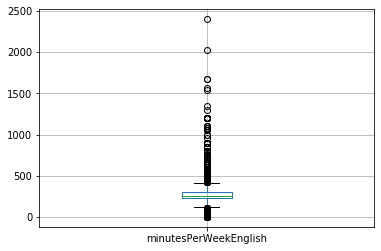

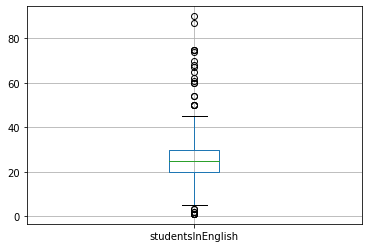

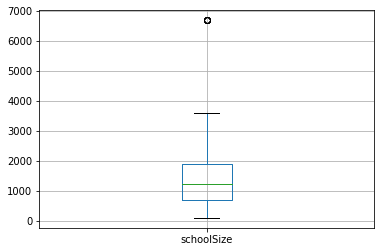

In [26]:
continuous = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In statistics, the `lower fence` is the "lower limit" and the `upper fence` is the "upper limit" of data. Anything outside these defined bounds can be considered an outlier. 

LF = Q1 - 1.5 * IQR

UF = Q3 + 1.5 * IQR

We create a function for calculating these for a given dataframe.

In [24]:
def remove_outliers(continous_columns, dataframe):
    """Remove any values below the lower fence and above the upper fence from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        dataframe = dataframe[dataframe[column] > lower_fence]
        dataframe = dataframe[dataframe[column] < upper_fence]
    return dataframe

We then run that function on our dataframe `df` and see how it affected our variables.

In [27]:
df = remove_outliers(continuous, df)

Without Outliers:


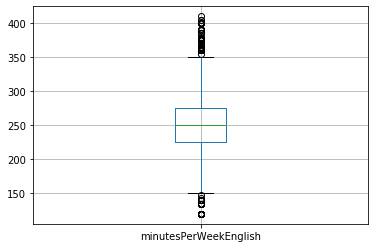

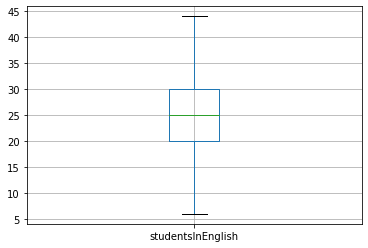

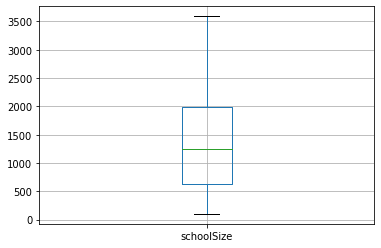

In [28]:
print("Without Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In [51]:
df.shape

(2747, 24)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 2 to 1565
Data columns (total 22 columns):
grade                    3109 non-null int64
male                     3109 non-null int64
raceeth                  3109 non-null object
preschool                3109 non-null float64
expectBachelors          3109 non-null float64
motherHS                 3109 non-null float64
motherWork               3109 non-null float64
fatherHS                 3109 non-null float64
fatherWork               3109 non-null float64
selfBornUS               3109 non-null float64
motherBornUS             3109 non-null float64
fatherBornUS             3109 non-null float64
englishAtHome            3109 non-null float64
computerForSchoolwork    3109 non-null float64
read30MinsADay           3109 non-null float64
minutesPerWeekEnglish    3109 non-null float64
studentsInEnglish        3109 non-null float64
schoolHasLibrary         3109 non-null float64
publicSchool             3109 non-null int64
urban  

After cleaning our given data, we are left with 2,747 rows and 21 feature columns. 

### Testing Code

In [ ]:
# df.dropna(inplace=True)